In [1]:
#Import and split data

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [5]:
#First, We will work on one variable

In [22]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [23]:
#Setting and fitting a model

In [24]:
from sklearn.tree import DecisionTreeRegressor
cart_model=DecisionTreeRegressor()

In [25]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
#Visualization


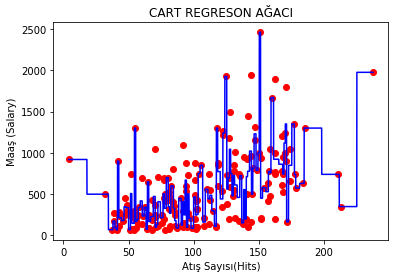

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;


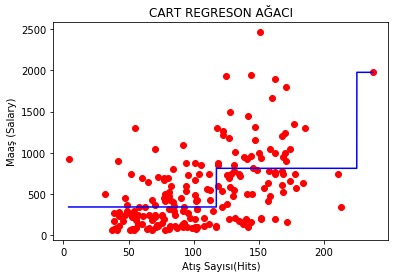

In [30]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=3)
cart_model
cart_model.fit(X_train, y_train)
import numpy as np
import matplotlib.pyplot as plt

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;


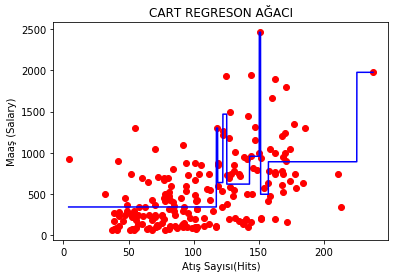

In [32]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10)
cart_model
cart_model.fit(X_train, y_train)
import numpy as np
import matplotlib.pyplot as plt

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;


In [ ]:
#Rule Set of the tree

In [40]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57151 sha256=a0744e791100ebba57d6750371e2356e482c65d583498fb9afc5546e69cad9ec
  Stored in directory: c:\users\deniz\appdata\local\pip\cache\wheels\1f\f6\09\b8aec43d39ab30463488d91526f29ba56155a6a6d61cf69986
Successfully built skompiler


You should consider upgrading via the 'c:\users\deniz\anaconda3\python.exe -m pip install --upgrade pip' command.


In [41]:
from skompiler import skompile

In [45]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Deniz\anaconda3\python.exe -m pip install --upgrade pip' command.


In [46]:
print(skompile(cart_model.predict).to("python/code"))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



In [47]:
#Prediction

In [58]:
x=[91]

In [59]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [60]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [61]:
cart_model.predict([[91]])

array([345.20115517])

In [62]:
y_pred=cart_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))        #rmse without tuning

486.34593105235456

In [66]:
#Model Tuning
# Grid Search Cv
# setting params range and cv
# fitting X_tain and y_train
# finding best params
# setting and fitting tuned model

In [112]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [113]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [122]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [123]:
from sklearn.model_selection import GridSearchCV
cart_cv_model= GridSearchCV(cart_model,cart_params, cv=10)

In [124]:
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs

In [125]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [145]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [146]:
cart_tuned.fit(X_train,y_train)    #fitted final model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=76,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [147]:
y_pred = cart_tuned.predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_pred,y_test))

423.406689243066

In [149]:
#Secondly, We will work on all x variables

In [156]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [157]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model= GridSearchCV(cart_model,cart_params, cv=10)
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs

In [158]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [159]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [160]:
cart_tuned.fit(X_train,y_train)   

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=37,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [161]:
y_pred = cart_tuned.predict(X_test)

In [162]:
np.sqrt(mean_squared_error(y_pred,y_test))

376.3978820710986

In [ ]:
# We found 413 for KNN, 
#          367 for SVR,
#          363 Artifical Neural Network.
# And now, 376 for CART

#In these models(KNN-SVR-ANN-CART), the best one is ANN for "hitters" data set, till now.
